In [12]:
import os
import cv2
from os import path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_root = '/home/swhong/01_NAFNet/AIISP2024'
df_result = pd.read_csv(osp.join(path_root, 'results/NAFNetv2-SIDD/SIDD_val.csv'))

In [4]:
dff = df_result.groupby('image_index').mean()
dff.sort_values(by='psnr')

,patch_index,psnr,ssim
image_index,,,
183,1231.5,29.275450,0.712927
53,303.5,29.652553,0.818484
85,591.5,30.444769,0.791111
171,1135.5,30.765783,0.703024
109,751.5,31.391446,0.728389
82,559.5,31.555750,0.852752
21,47.5,32.335550,0.783041
128,879.5,32.554630,0.732839
79,527.5,33.502139,0.931647


patch viewer

In [26]:
df_image = df_result[df_result['image_index']==183]
print(len(df_image))
df_image.sort_values(by='patch_index')


32


,patch_index,image_index,psnr,ssim
579,1216,183,28.717591,0.711537
125,1217,183,29.198476,0.666616
181,1218,183,28.439663,0.587040
923,1219,183,29.653960,0.811377
403,1220,183,29.513456,0.753942
915,1221,183,28.982774,0.747555
273,1222,183,30.300385,0.839967
1038,1223,183,29.642955,0.832597
816,1224,183,28.528737,0.724950
1098,1225,183,29.414092,0.674512


In [9]:
benchmark_folder = "/home/swhong/SIDD_Benchmark_Data"
benchmark_images = sorted(os.listdir(benchmark_folder), key=lambda x: int(x.split('_')[0]))

gt_srgb_folder = '/data1/SIDD_raw/valid/valid_gt_srgb_crops'
gt_raw_folder = '/data1/SIDD_raw/valid/valid_gt_srgb_crops'
lq_folder = '/data1/SIDD_raw/valid/valid_lq_raw_crops'

In [27]:
patch_index = 1216
# image_index = patch_index // 32

gt_raw_name = f"ValidationBlocksRaw_{patch_index}.raw"
gt_srgb_name = f"ValidationBlocksSrgb_{patch_index}.png"

gt_raw_path = osp.join(gt_raw_folder, gt_raw_name)
gt_srgb_path = osp.join(gt_srgb_folder, gt_srgb_name)



In [28]:
img_cv2 = cv2.imread(gt_srgb_path)

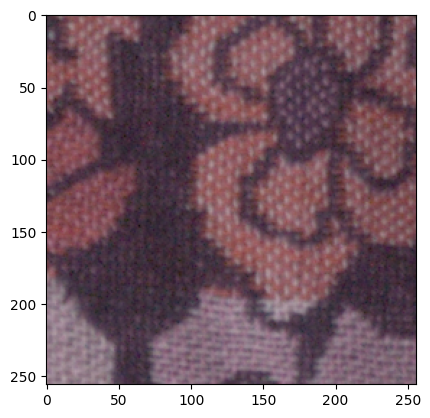

In [29]:
plt.imshow(img_cv2)

In [30]:
with open(gt_srgb_path, 'rb') as f:
  buf = f.read()
img_np = np.frombuffer(buf, np.uint8)
img = cv2.imdecode(img_np, cv2.IMREAD_COLOR)


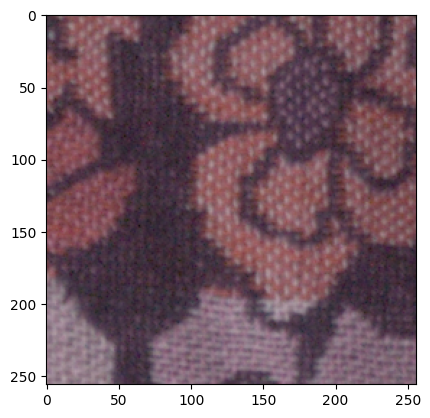

In [31]:
plt.imshow(img)

In [19]:
np.testing.assert_equal(img, img_cv2)

In [20]:
result_folder = '/home/swhong/01_NAFNet/AIISP2024/results/NAFNetv2-SIDD/visualization/SIDD_val/'
result_path = osp.join(result_folder, f"{patch_index}_lq.png")
result = cv2.imread(result_path)

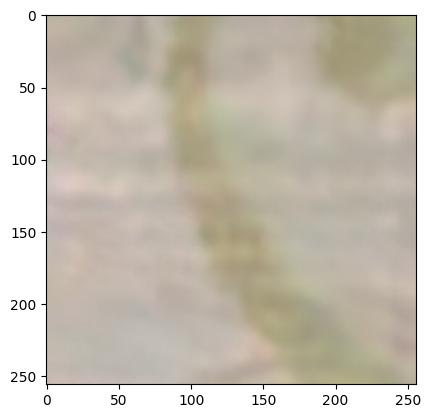

In [22]:
plt.imshow(result)